# Validation Set 1.2: diffuPy + PathMe  

In [1]:
import os
import itertools

dir_path = os.path.dirname(os.path.realpath('__file__'))

In [2]:
from openpyxl import load_workbook
from collections import defaultdict
import networkx as nx

In [3]:
import pybel
import pybel_tools as pbt

from pybel import BELGraph
from pybel.constants import RELATION
from pybel.dsl import Abundance, BiologicalProcess, CentralDogma, ListAbundance, Reaction

from pathme.constants import REACTOME_BEL, KEGG_BEL, WIKIPATHWAYS_BEL, PATHME_DIR

pybel.get_version()

'0.13.1'

In [4]:
from diffuPy.diffuse import diffuse
from diffuPy.matrix import Matrix, LaplacianMatrix

In [5]:
import nbimporter
from global_database_comparison import get_set_database, calculate_database_sets_as_dict

Importing Jupyter notebook from global_database_comparison.ipynb


## 1. Load Data Set 1: Input Scores

In [6]:
def munge_labels(label):
    """Process ene"""
    remove_set = ['*', ' ', '|', '-', '"', "'"]
    
    label = str(label).lower()
    
    for symb in remove_set:
        if symb in label:
            label = label.replace(symb, '')
    
    if '/' in label:
        label = tuple(set(label.split('/')))
        if len(label) == 1:
            label = label[0]
    
    return label


def parse_set1(path):
    
    wb = load_workbook(filename = path)

    sheet_titles = []
    omics_data = defaultdict(lambda:defaultdict(lambda:set()))
    omics_labels = defaultdict(lambda:set())

    for sheet in wb:
        cell_value = sheet['A3'].value

        # if "Expression data (FC) of the differentially expressed" in sheet['A1'].value:
        #    sheet_title = sheet['A1'].value.split("Expression data (FC) of the differentially expressed ",1)[1]
        #    sheet_title = sheet_title.split(" of HepG2 cells after treatment with ")
        #    sheet_title[1] = sheet_title[1].replace(". Statistical significance (p value < 0.05) is indicated.", "").replace(" CsA for", "")
        #    sheet_titles.append(sheet_title)

        if cell_value and ("Significant " in cell_value or "Metabolite" == cell_value):
            if  cell_value == "Metabolite":
                sheet_title = ("Metabolite", '3 µM', ' 24h or 72h')
                min_row = 3

            else:
                sheet_title = cell_value.split("Significant ",1)[1]
                sheet_title = sheet_title.split(" CsA ")
                sheet_title.append(sheet_title[1].split(" ")[0] + ' h')
                sheet_title[1] = sheet_title[0].split(" ")[1]+ ' µM'
                sheet_title[0] = sheet_title[0].split(" ")[0]
                min_row = 4

            for col in sheet.iter_cols(min_row=min_row):
                col_label = col[0].value
                sheet_omic = sheet_title[0]
                
                if col_label in ['MicroRNA', 'hgnc symbol', 'Metabolite']:
                    #for cell in col[1:]: 
                        #if munge_labels(cell.value) == '':
                            #print(cell) 
                            #print(cell.value) 
                    omics_labels[sheet_omic.lower()].update(munge_labels(cell.value) for cell in col[1:] if munge_labels(cell.value) != '')

            sheet_titles.append(sheet_title)

    return omics_labels
    
dataset1_omics_labels = parse_set1(os.path.join(dir_path, 'validation', 'set1.xlsx'))
dataset1_omics_labels

defaultdict(<function __main__.parse_set1.<locals>.<lambda>()>,
            {'genes': {'lgals2',
              'coro2b',
              'tceal4',
              'kbtbd8',
              'ppdpf',
              'dock4',
              'rnmtl1',
              'pgc',
              'dgkd',
              'ankrd9',
              'clcn6',
              'ppp1r9a',
              'phyhipl',
              'bean1',
              'nup155',
              'tnks',
              'eef1d',
              'rbck1',
              's100a4',
              'scn1a',
              'atp6v1e1',
              'ahsg',
              'gxylt1',
              'mthfd2l',
              'kbtbd7',
              'tspan3',
              'pa2g4',
              'pdpk1',
              'nr2f2',
              'dgcr2',
              'ezh1',
              'tmem139',
              'ckap2l',
              'tmem231',
              'cyb5r4',
              'polr3e',
              'frk',
              'iqcg',
              'zbed5',
            

In [7]:
print(dataset1_omics_labels.keys())

dict_keys(['genes', 'micrornas', 'metabolite'])


In [8]:
print(f'Total number of genes: ({len(dataset1_omics_labels["genes"])})')

print(f'Total number of metabolites: ({len(dataset1_omics_labels["metabolite"])})')

print(f'Total number of miRNAs: ({len(dataset1_omics_labels["micrornas"])})')

total_entities = len(dataset1_omics_labels["metabolite"]) + len(dataset1_omics_labels["micrornas"]) + len(dataset1_omics_labels["genes"])

print(total_entities)

Total number of genes: (4941)
Total number of metabolites: (21)
Total number of miRNAs: (100)
5062


In [219]:
all_omics_labels_dataset1 = set()
for labels in dataset1_omics_labels.values():
    all_omics_labels_dataset1.update(set(labels))
                                         
all_omics_labels_dataset1

{'lgals2',
 'coro2b',
 'stxbp4',
 'tceal4',
 'kbtbd8',
 'fam19a4',
 'epha1',
 'cdk6',
 'mrpl23',
 'ppdpf',
 'ttpal',
 'dock4',
 'rnmtl1',
 'pgc',
 'dgkd',
 'ankrd9',
 'sh2d4a',
 'clcn6',
 'ppp1r9a',
 'maff',
 'trmt1',
 'bloc1s3',
 'ndufc2',
 'wdyhv1',
 'fam102b',
 'eif4e2',
 'hm13',
 'phyhipl',
 'slc12a6',
 'bean1',
 'nup155',
 'tnks',
 'pld1',
 'eef1d',
 'rbck1',
 's100a4',
 'c7orf68',
 'bivm',
 'scn1a',
 'gpd1l',
 'gpr56',
 'aim1l',
 'atp6v1e1',
 'ahsg',
 'cenpf',
 'tmem64',
 'gpn3',
 'lcmt2',
 'gxylt1',
 'utp14a',
 'myo5b',
 'mthfd2l',
 'kbtbd7',
 'nmnat1',
 'c10orf118',
 'tspan3',
 'pa2g4',
 'gcat',
 'ufm1',
 'necap1',
 'hsamir659',
 'mthfd1l',
 'mrpl46',
 'dnase1l1',
 'atp5b',
 'pdpk1',
 'yaf2',
 'ddc',
 'poc1b',
 'rbm47',
 'srsf1',
 'arl6ip5',
 'surf1',
 'mbtps2',
 'nr2f2',
 'intu',
 'ttll11',
 'ccdc130',
 'prnp',
 'c11orf10',
 'mgst2',
 'hdhd2',
 ('mmumir320', 'hsamirplusi320a', 'rnomir320'),
 'dgcr2',
 'slc25a25',
 'ezh1',
 'eya3',
 'tmem139',
 'ckap2l',
 'tsen2',
 'map3k14',
 

## 2. Load Backrgound Graph Universe

### PathMeUniverse import

In [128]:
pathme_graph_universe_no_explode = pybel.from_pickle(os.path.join(PATHME_DIR, 'universe', 'pathme_graph_universe_explode_v0.1.bel.pickle'))
pathme_graph_universe_no_explode

In [129]:
pathme_graph_universe_no_explode.summarize()

PathMe Universe v1.0.0
Number of Nodes: 20768
Number of Edges: 84945
Network Density: 1.97E-04
Number of Components: 11815
Number of Warnings: 0


### Export to gml

In [130]:
def munge_node_attribute(node, attribute = 'name'):
    if node.get(attribute) == None:
        return str(node)
    else:
        return node.get(attribute)

    
def to_gml(graph: BELGraph, path: str = PATHME_DIR) -> None:
    """Write this graph to GML  file using :func:`networkx.write_gml`.
    """
    rv = nx.MultiDiGraph()

    for node in graph:
        rv.add_node(munge_node_attribute(node, 'name'), namespace = str(node.get('namespace')), function=node.get('function'))

    for u, v, key, edge_data in graph.edges(data=True, keys=True):
        rv.add_edge(
            munge_node_attribute(u),
            munge_node_attribute(v),
            interaction=str(edge_data[RELATION]),
            bel=str(edge_data),
            key=str(key),
        )


    nx.write_gml(rv, path)

In [131]:
to_gml(pathme_graph_universe_no_explode, os.path.join(PATHME_DIR, 'pathme_graph_universe_no_explode.gml'))

In [132]:
g = nx.read_gml(os.path.join(PATHME_DIR, 'pathme_graph_universe_no_explode.gml'))

In [133]:
nx.info(g)

'Name: \nType: MultiDiGraph\nNumber of nodes: 20768\nNumber of edges: 84945\nAverage in degree:   4.0902\nAverage out degree:   4.0902'

##### Get isolates

In [134]:
isolates = list(nx.isolates(g))

#import json
#with open(os.path.join(PATHME_DIR, 'isolates.json'), 'w') as outfile:
#    d = json.dump(isolates, outfile)
    
len(isolates)

11569

In [135]:
isolates

['hydroquinone O-beta-D-glucopyranoside',
 'arbutin 6-phosphate',
 'salicin 6-phosphate',
 'salicin',
 'TITLE:Glycolysis / Gluconeogenesis',
 'TITLE:Citrate cycle (TCA cycle)',
 'alpha-D-ribose 1,5-bisphosphate',
 '2-dehydro-3-deoxy-D-gluconic acid',
 '2-amino-2-deoxy-D-gluconic acid',
 '2-dehydro-3-deoxy-6-phospho-D-gluconic acid',
 '6-phospho-2-dehydro-D-gluconic acid',
 '2-dehydro-D-gluconic acid',
 'D-arabino-hex-3-ulose 6-phosphate',
 '172232326',
 'TITLE:Pentose phosphate pathway',
 '3-dehydro-L-gulonic acid 6-phosphate',
 'D-altronic acid',
 'D-fructofuranuronic acid',
 'D-mannonic acid',
 'D-tagaturonate',
 'D-glucuronate 1-phosphate',
 '2-dehydro-3-deoxy-D-arabinonic acid',
 'D-xylonic acid',
 'D-ribulose',
 'ribitol',
 'D-lyxopyranose',
 'L-ribulose',
 'L-xylulose 5-phosphate',
 'L-lyxopyranose',
 'L-ribulose 5-phosphate',
 'D-arabinitol',
 'pectin',
 'pectate',
 'digalacturonic acid',
 '4-(4-deoxy-alpha-D-gluc-4-enosyluronic acid)-D-galacturonic acid',
 '5-dehydro-4-deoxy-D-

In [136]:
list(nx.isolates(pathme_graph_universe_no_explode))

[<BEL a(CHEBI:"hydroquinone O-beta-D-glucopyranoside")>,
 <BEL a(CHEBI:"arbutin 6-phosphate")>,
 <BEL a(CHEBI:"salicin 6-phosphate")>,
 <BEL a(CHEBI:salicin)>,
 <BEL bp(KEGG:"TITLE:Glycolysis / Gluconeogenesis")>,
 <BEL bp(KEGG:"TITLE:Citrate cycle (TCA cycle)")>,
 <BEL a(CHEBI:"alpha-D-ribose 1,5-bisphosphate")>,
 <BEL a(CHEBI:"2-dehydro-3-deoxy-D-gluconic acid")>,
 <BEL a(CHEBI:"2-amino-2-deoxy-D-gluconic acid")>,
 <BEL a(CHEBI:"2-dehydro-3-deoxy-6-phospho-D-gluconic acid")>,
 <BEL a(CHEBI:"6-phospho-2-dehydro-D-gluconic acid")>,
 <BEL a(CHEBI:"2-dehydro-D-gluconic acid")>,
 <BEL a(CHEBI:"D-arabino-hex-3-ulose 6-phosphate")>,
 <BEL a(PUBCHEM:172232326)>,
 <BEL bp(KEGG:"TITLE:Pentose phosphate pathway")>,
 <BEL a(CHEBI:"3-dehydro-L-gulonic acid 6-phosphate")>,
 <BEL a(CHEBI:"D-altronic acid")>,
 <BEL a(CHEBI:"D-fructofuranuronic acid")>,
 <BEL a(CHEBI:"D-mannonic acid")>,
 <BEL a(CHEBI:"D-tagaturonate")>,
 <BEL a(CHEBI:"D-glucuronate 1-phosphate")>,
 <BEL a(CHEBI:"2-dehydro-3-deoxy-D-

### Entity subsets

##### PathMe package subsets

In [137]:
def get_db_entites(databases):
    db_entites = defaultdict(dict)
    entites_db = defaultdict(lambda: defaultdict(set))
    for db in databases:
        genes, mirna, metabolites, bps = get_set_database(db)
        db_entites[db] = {'genes': genes, 'mirna': mirna, 'metabolites': metabolites, 'bps': bps}
        for entity_type, entities in db_entites[db].items():
            entites_db[entity_type][db] = entities
    return db_entites, entites_db

In [138]:
db_entites_pm, entites_db_pm = get_db_entites(['reactome', 'kegg', 'wikipathways'])

In [253]:
def print_entities_db_dict(entites_db):
    for db_name, db in entites_db.items():
        m = ''
        for entity_type, entites in db.items():
            m += f'{entity_type}({len(entites)}), '
        print(f'Total number of {db_name}: {m} ')
        
print_entities_db_dict(db_entites_pm)

Total number of reactome: genes(6328), mirna(11), metabolites(2559), bps(2101),  
Total number of kegg: genes(2086), mirna(0), metabolites(572), bps(147),  
Total number of wikipathways: genes(3025), mirna(68), metabolites(454), bps(102),  


#####  PathMeUniverse Graph Subsets

In [82]:
db_subsets_pmu = defaultdict(set)
db_entites_pmu = defaultdict(dict)

entity_type_map = {'Gene':'genes', 'Abundance':'mirna', 'Abundance':'metabolites', 'BiologicalProcess':'bps'}

for node, data in pathme_graph_universe_no_explode.nodes(data=True):
    for database in data['database']:
        db_subsets_pmu[database].add(node)

for database, nodes in db_subsets_pmu.items():
    db_entites_pmu[database] = calculate_database_sets_as_dict(nodes, database)

In [83]:
print_entities_db_dict(db_entites_pmu)

Total number of kegg: gene_nodes(2086), mirna_nodes(0), metabolite_nodes(572), bp_nodes(147),  
Total number of reactome: gene_nodes(5401), mirna_nodes(11), metabolite_nodes(2547), bp_nodes(2101),  
Total number of wikipathways: gene_nodes(2588), mirna_nodes(68), metabolite_nodes(454), bp_nodes(102),  


###  Subgraphs 

In [84]:
# TODO
# def get_subgraphs_by_entity(graph: BELGraph) -> dict:
#     entities_types = ['genes', 'mirna', 'metabolites', 'bps']
#     subgraphs = {}
    
#     for entities_type in entities_types:
#         subgraphs[entities_type] = pbt.selection.get_subgraph_by_node_filter(graph, function=entities_type, value=f'PathME {entities_type}' )

#     return subgraphs

# get_subgraphs_by_entity(pathme_graph_universe_no_explode)

# TODO
#def get_subgraphs_by_resource(graph: BELGraph) -> None:

### Background  Matrix

In [140]:
len(list(pathme_graph_universe_no_explode.nodes))

20768

In [141]:
background_mat = LaplacianMatrix(pathme_graph_universe_no_explode)
print(background_mat)

Node name nor id not labeled. bp(KEGG:"path:map04688")
Node name nor id not labeled. bp(KEGG:"path:map4670")
Node name nor id not labeled. bp(KEGG:"path:map00517")
Node name nor id not labeled. bp(KEGG:"path:map09020")
Columns labels are assigned to rows since duplicate labels is true.



matrix  
  [[41  0  0 ...  0  0  0]
 [ 0 53  0 ...  0  0  0]
 [ 0  0 37 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]] 
 row labels: 
  ['acetate', 'd-glucopyranose', 'alpha-d-glucose 1-phosphate', '2-phospho-d-glyceric acid', 'alpha-d-glucose', 'beta-d-glucose', 'dihydroxyacetone phosphate', 'beta-d-glucose 6-phosphate', 'alpha-d-glucose 6-phosphate', 'beta-d-fructofuranose 6-phosphate', 'phosphoenolpyruvic acid', '3-phospho-d-glyceric acid', '3-phospho-d-glyceroyl dihydrogen phosphate', '(s)-lactic acid', 'enzyme n6-(lipoyl)lysine', 'ethanol', 'pyruvic acid', '2-(1-hydroxyethyl)thiamine diphosphate', 'acetyl-coa', 'acetaldehyde', '[dihydrolipoyllysine-residue acetyltransferase] s-acetyldihydrolipoyllysine', 'enzyme n6-(dihydrolipoyl)lysine', 'beta-d-fructofuranose 1,6-bisphosphate', 'hydroquinone o-beta-d-glucopyranoside', 'arbutin 6-phosphate', 'salicin 6-phosphate', 'salicin', 'oxaloacetic acid', '2,3-bisphospho-d-glyceric acid', 'd-

### Row labels

In [142]:
background_labels = set(background_mat.rows_labels)

## 3. Dataset label mapping to PathMe

In [437]:
def check_substrings(dataset_nodes, db_nodes):
    intersection_close = set()

    for entity in dataset_nodes:
        if isinstance(entity, tuple):
            for subentity in entity:
                for entity_db in db_nodes:
                    if isinstance(entity_db, tuple):
                        for subentity_db in entity_db:
                            if subentity_db in subentity or subentity in subentity_db:
                                intersection_close.add(subentity_db)
                                break
                        break
                    else:
                        if entity_db in subentity or subentity in entity_db:
                            intersection_close.add(entity_db)
                            break
        else:
            if isinstance(entity_db, tuple):
                for subentity_db in entity_db:
                    if subentity_db in subentity or subentity in subentity_db:
                        intersection_close.add(subentity_db)
                        break
            else:
                for entity_db in db_nodes:
                    if entity_db in entity or entity in entity_db:
                        intersection_close.add(entity_db)
                        break
    return intersection_close

#### Input vector/matrix construction

In [438]:
def generate_categoric_input(rows_labels, cols_labels):
    input_mat = Matrix(rows_labels=rows_labels, cols_labels=cols_labels, init=1)
    return input_mat.match_missing_rows(background_mat.rows_labels, 0).match_rows(background_mat)

### General mapping

In [439]:
dataset1_omics_labels

defaultdict(<function __main__.parse_set1.<locals>.<lambda>()>,
            {'genes': {'lgals2',
              'coro2b',
              'tceal4',
              'kbtbd8',
              'ppdpf',
              'dock4',
              'rnmtl1',
              'pgc',
              'dgkd',
              'ankrd9',
              'clcn6',
              'ppp1r9a',
              'phyhipl',
              'bean1',
              'nup155',
              'tnks',
              'eef1d',
              'rbck1',
              's100a4',
              'scn1a',
              'atp6v1e1',
              'ahsg',
              'gxylt1',
              'mthfd2l',
              'kbtbd7',
              'tspan3',
              'pa2g4',
              'pdpk1',
              'nr2f2',
              'dgcr2',
              'ezh1',
              'tmem139',
              'ckap2l',
              'tmem231',
              'cyb5r4',
              'polr3e',
              'frk',
              'iqcg',
              'zbed5',
            

In [440]:
def get_mapping(to_map, background_map, mirnas = False, submapping = None):
    #TODO: Mapping substring not other than mirnas

    intersection = to_map.intersection(background_map)
    
    if mirnas:
        mirnas_substring = [e for e in check_substrings(dataset1_omics_labels['micrornas'], background_map)if 'mir' in e]
        return intersection.union(mirnas_substring)
    
    if submapping:
        return intersection.intersection(submapping)
    
    return intersection
    

In [441]:
all_labels_mapping = get_mapping(all_omics_labels_dataset1, background_labels, mirnas=True)
len(all_labels_mapping)

2589

In [442]:
def get_mapping_mirnas(to_map, background_map):
    check_substrings(to_map, background_map)

In [443]:
all_labels_mapping

{'ech1',
 'epha1',
 'cdk6',
 'olah',
 'mrpl23',
 'slc16a10',
 'dock4',
 'egr1',
 'hnrnpa0',
 'dgkd',
 'gnpat',
 'timp1',
 'vcl',
 'ppih',
 'bloc1s3',
 'ndufc2',
 'maff',
 'eif4e2',
 'tst',
 'nadph',
 'nup155',
 'eif3d',
 'tnks',
 'pld1',
 'eef1d',
 'rbck1',
 'icam1',
 'pdcd4',
 'scn1a',
 'gpd1l',
 'tmem11',
 'patl1',
 'gdpd3',
 'atp6v1e1',
 'dlg1',
 'man2c1',
 'preb',
 'cenpf',
 'slc27a2',
 'gxylt1',
 'tle3',
 'utp14a',
 'gtf2f1',
 'mthfd2l',
 'fbxo25',
 'nmnat1',
 'nagpa',
 'gcat',
 'impa1',
 'mthfd1l',
 'mrpl46',
 'kifap3',
 'pdpk1',
 'ddc',
 'rbm47',
 'snx12',
 'cyld',
 'srsf1',
 'gphn',
 'slc7a11',
 'cul4a',
 'smc2',
 'ppp1r3d',
 'mbtps2',
 'errfi1',
 'nr2f2',
 'trim25',
 'med21',
 'prnp',
 'ube2j1',
 'pigx',
 'mgst2',
 'pex11a',
 'ezh1',
 'rap1gap2',
 'cebpd',
 'plxna3',
 'enpp2',
 'chst15',
 'bub1',
 'map3k14',
 'ndel1',
 'cyb5r4',
 'polr3e',
 'frk',
 'aldh2',
 'cd58',
 'enpp3',
 'ndufc1',
 'tbc1d20',
 'usp25',
 'chpf',
 'cth',
 'notum',
 'mov10',
 'elmo3',
 'khk',
 'parp1',
 'pl

##### Mapping percentage

In [444]:
print(len(all_labels_mapping)/len(background_labels))

0.12466294298921418


In [445]:
print(len(all_labels_mapping)/len(all_omics_labels_dataset1))

0.5114579217700513


#### Input vector/matrix construction

In [446]:
input_mat = generate_categoric_input(all_labels_mapping, ['Dataset 1'])

### Mapping subsets

#### Mapping by entity type

In [483]:
def get_mapping_by_entity_type(dataset_entites_dict, background_labels, submapping = None):
    mapping_dict = {}
    mirnas = False
    percentage = 0
    
    for type_name, entites in dataset_entites_dict.items():
        if type_name == 'micrornas' or type_name =='mirna':
            mirnas = True
        else:
            mirnas = False
            
        mapping = get_mapping(entites, background_labels, mirnas, submapping = None)
            
        if len(entites) != 0:
            percentage = len(mapping)/len(entites)
            print(f'{type_name} ({str(len(mapping))}) {(len(mapping)/len(entites))*100}%')
        
        mapping_dict[type_name] = (mapping, percentage)

        # print(entites)
        # print(mapping)
        
    return mapping_dict

In [484]:
mapping_by_entity = get_mapping_by_entity_type(dataset1_omics_labels, background_labels)

genes (2555) 51.710180125480676%
micrornas (18) 18.0%
metabolite (16) 76.19047619047619%


#### Mapping by database

In [485]:
def get_mapping_by_database(dataset_entites, background_entites_by_db_dict, submapping = None):
    mapping_dict = {}
    
    for db_name, entites in background_entites_by_db_dict.items():
                   
        mapping = get_mapping(dataset_entites, entites, True, submapping)
            
        mapping_dict[db_name] = mapping
        print(f'{db_name} ({str(len(mapping))}) {(len(mapping)/len(dataset_entites))*100}%')

        # print(entites)
        # print(mapping)
        
    return mapping_dict

In [486]:
db_pm = {db : set(itertools.chain.from_iterable(entities.values())) for db, entities in db_entites_pm.items()}          

In [487]:
mapping_by_db = get_mapping_by_database(all_omics_labels_dataset1, db_pm)

reactome (1393) 27.51876728565784%
kegg (692) 13.670485973923348%
wikipathways (955) 18.866060845515605%


#### Mapping by entity type and database

In [488]:
def get_mapping_by_database_and_entity(dataset_entites, background_entites_by_database_and_entity, background_labels):
    mapping_dict = {}
    
    for db_name, entites in background_entites_by_database_and_entity.items():
        print(f'{db_name} ')

        mapping_dict[db_name] = get_mapping_by_entity_type(entites, dataset_entites, submapping = background_labels)
        
        # print(entites)
        # print(mapping)
        
    return mapping_dict

In [489]:
mapping_by_database_and_entity = get_mapping_by_database_and_entity(all_omics_labels_dataset1, db_entites_pm, background_labels)


reactome 
genes (1388) 21.93426042983565%
mirna (3) 27.27272727272727%
metabolites (10) 0.3907776475185619%
bps (0) 0.0%
kegg 
genes (689) 33.02972195589645%
metabolites (3) 0.5244755244755245%
bps (0) 0.0%
wikipathways 
genes (934) 30.876033057851238%
mirna (3) 4.411764705882353%
metabolites (12) 2.643171806167401%
bps (0) 0.0%


##### View

In [535]:
all_count = []
all_percentage = []

for db_name, entities_by_type in mapping_by_database_and_entity.items():
    db_count = []
    db_percentage = []

    for entity_type, entities_tupple in entities_by_type.items():
        db_count.append(len(entities_tupple[0]))
        db_percentage.append(entities_tupple[1])
        
    all_count.append(db_count)
    all_percentage.append(db_percentage)

In [536]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

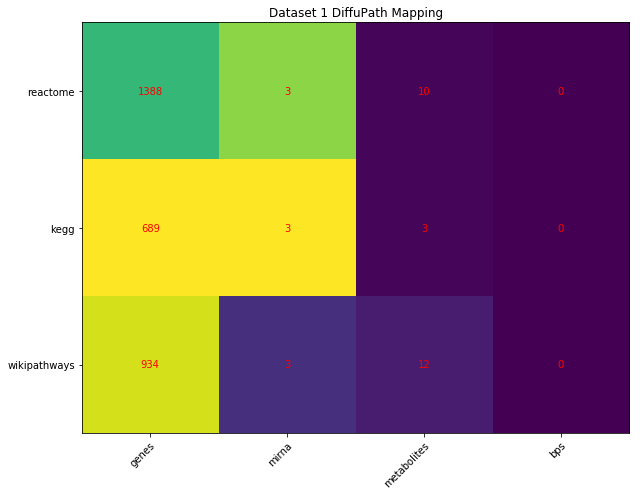

In [552]:
databases = mapping_by_database_and_entity.keys()
entity_types = mapping_by_database_and_entity['kegg'].keys()

entity_number = np.array(all_percentage)
entity_count = np.array(all_count)


fig, ax = plt.subplots(figsize=(15,7))
im = ax.imshow(entity_number)

# We want to show all ticks...
ax.set_xticks(np.arange(len(entity_types)))
ax.set_yticks(np.arange(len(databases)))

# ... and label them with the respective list entries
ax.set_xticklabels(entity_types)
ax.set_yticklabels(databases)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(databases)):
    for j in range(len(entity_types)):
        text = ax.text(j, i, entity_count[i, j],
                       ha="center", va="center", color="r")

ax.set_title("Dataset 1 DiffuPath Mapping")
fig.tight_layout()
plt.show()

In [554]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", title = "", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels
                     for the rows
        col_labels : A list or array of length M with the labels
                     for the columns
    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    ax.set_title(title)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Arguments:
        im         : The AxesImage to be labeled.
    Optional arguments:
        data       : Data used to annotate. If None, the image's data is used.
        valfmt     : The format of the annotations inside the heatmap.
                     This should either use the string format method, e.g.
                     "$ {x:.2f}", or be a :class:`matplotlib.ticker.Formatter`.
        textcolors : A list or array of two color specifications. The first is
                     used for values below a threshold, the second for those
                     above.
        threshold  : Value in data units according to which the colors from
                     textcolors are applied. If None (the default) uses the
                     middle of the colormap as separation.

    Further arguments are passed on to the created text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [ ]:
databases = mapping_by_database_and_entity.keys()
entity_types = mapping_by_database_and_entity['kegg'].keys()

entity_number = np.array(all_percentage)
entity_count = np.array(all_count)

In [561]:
databases = mapping_by_database_and_entity.keys()
entity_types = mapping_by_database_and_entity['kegg'].keys()

entity_number = np.array(all_percentage)
entity_count = np.array(all_count)

/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:106: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


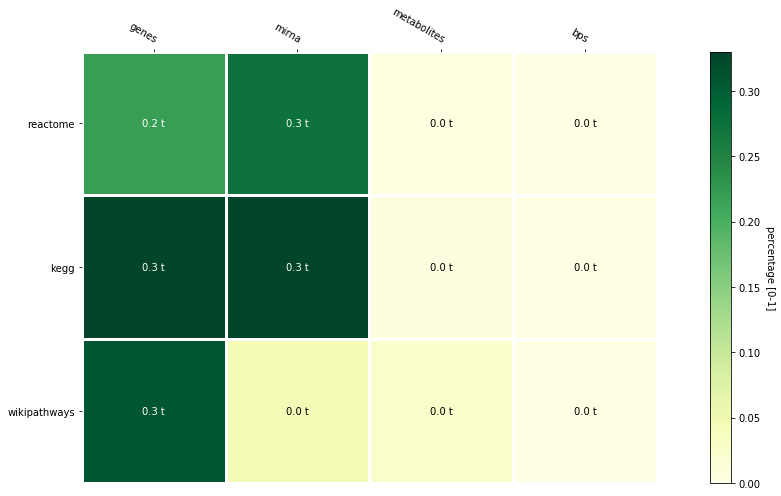

In [564]:
fig, ax = plt.subplots(figsize=(15,7))

im, cbar = heatmap(entity_number, databases, entity_types, ax=ax,
                   cmap="YlGn", cbarlabel="percentage [0-1]")
texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
ax.set_title("Dataset 1 DiffuPath Mapping")

plt.show()

#### Input vector/matrix construction

In [308]:
input_mats_by_entity_type = {entity_type: generate_categoric_input(all_labels_mapping, ['Dataset 1']) for entity_type, map_value in mapping_by_entity.items()}

#### Mapping by resource/database

In [37]:
# TODO: Check further.
# def get_mapping_by_entity_type(dataset_entites_dict, background_entites_dict):
#     mapping = {}

#     background_entities_by_type = {entity_type: set(itertools.chain.from_iterable(v.values())) for entity_type, v in entites_db.items()}
    
#     print(len(list(itertools.chain.from_iterable(background_entities_by_type.values()))))
#     mapping = defaultdict(set)
#     for type_name, background_entites in background_entities_by_type.items():
#         mapping[type_name] = get_mapping(dataset_entites_dict[type_name], entites)

#    for type_name, entites in dataset_entites_dict.items():
#        mapping[type_name] = get_mapping(entites, background_labels)
#        print(type_name)
#        print(len(mapping[type_name]))
#    return mapping

In [38]:
#mapping_by_entity = get_mapping_by_entity_type(dataset1_omics_labels, background_labels)

## 4. Score Diffusion with diffuPy: Dataset as input + PathMe as background graph

### Input elements: Dataset input + Background matrix

In [39]:
len(input_mat.mat)

20768

In [220]:
len(background_mat.mat)

20768

In [221]:
import time
import copy

In [222]:
input_mat_raw = copy.copy(input_mat)
background_mat_raw = copy.copy(background_mat)

input_mat_z = copy.copy(input_mat)
background_mat_z = copy.copy(background_mat)

Columns labels are assigned to rows since duplicate labels is true.
Columns labels are assigned to rows since duplicate labels is true.


### Compute diffusion scores

In [223]:
print(len(input_mat_raw.mat))
print(len(input_mat_raw.rows_labels))

20768
20768


#### Raw scores

In [44]:
then = time.time()
raw_scores = diffuse(input_mat_raw, 'ml', K = background_mat_raw)
now = time.time()
print("It took: ", now-then, " seconds")

It took:  1.9485998153686523  seconds


In [45]:
print(raw_scores)


matrix  
  [[-28]
 [-30]
 [-48]
 ...
 [  0]
 [ -2]
 [ -2]] 
 row labels: 
  ['acetate', 'd-glucopyranose', 'alpha-d-glucose 1-phosphate', '2-phospho-d-glyceric acid', 'alpha-d-glucose', 'beta-d-glucose', 'dihydroxyacetone phosphate', 'beta-d-glucose 6-phosphate', 'alpha-d-glucose 6-phosphate', 'beta-d-fructofuranose 6-phosphate', 'phosphoenolpyruvic acid', '3-phospho-d-glyceric acid', '3-phospho-d-glyceroyl dihydrogen phosphate', '(s)-lactic acid', 'enzyme n6-(lipoyl)lysine', 'ethanol', 'pyruvic acid', '2-(1-hydroxyethyl)thiamine diphosphate', 'acetyl-coa', 'acetaldehyde', '[dihydrolipoyllysine-residue acetyltransferase] s-acetyldihydrolipoyllysine', 'enzyme n6-(dihydrolipoyl)lysine', 'beta-d-fructofuranose 1,6-bisphosphate', 'hydroquinone o-beta-d-glucopyranoside', 'arbutin 6-phosphate', 'salicin 6-phosphate', 'salicin', 'oxaloacetic acid', '2,3-bisphospho-d-glyceric acid', 'd-glyceraldehyde 3-phosphate', 'thiamine(1+) diphosphate', 'pentose phosphate pathway', 'starch and sucrose me

###### By entity

In [46]:
mapping_by_entity

{'genes': {'rab11fip5',
  'ly96',
  'psmb8',
  'micb',
  'tkt',
  'jak1',
  'ccdc88c',
  'aldoc',
  'pds5',
  'apoc2',
  'nde1',
  'nme4',
  'mdm2',
  'hp',
  'ap2m1',
  'zwint',
  'prnp',
  'fanci',
  'bdh2',
  'tuba1a',
  'baat',
  'mdk',
  'ahi1',
  'inhbb',
  'rb1cc1',
  'hyal2',
  'sult1a2',
  'afp',
  'bet1',
  'sf3b5',
  'rhobtb3',
  'gnai2',
  'utp',
  'arse',
  'il32',
  'creg1',
  'hmgb1',
  'fktn',
  'hnmt',
  'csnk2a2',
  'cdkn1b',
  'c5',
  'adam17',
  'pxmp2',
  'commd1',
  'icam3',
  'ppih',
  'phf5a',
  'cttn',
  'tnfrsf10b',
  'rhot1',
  'aldh7a1',
  '4,5-dihydro-4-hydroxy-5-s-glutathionyl-benzo[a]pyrene',
  'fgfr1op',
  'lair2',
  'uxs1',
  'hcn',
  'gabrg2',
  'u2af1',
  'plk1',
  'slc44a4',
  'mecr',
  'f13b',
  'xaf1',
  'ppp3cb',
  'sesn1',
  'minpp1',
  'samhd1',
  'rfc5',
  'smurf1',
  'pdk1',
  'obsl1',
  'vc',
  'wasf3',
  'cables',
  'abcc10',
  'grb14',
  'agps',
  'cdk6',
  'dpp4',
  'pfn1',
  'wars2',
  'agpat3',
  'mep1a',
  'mkrn1',
  'dusp5',
  'pdss2',

#### Normalized z-scores

In [47]:
then = time.time()
z_scores = diffuse(input_mat_z, 'ml', K = background_mat_z, z = True)
now = time.time()
print("It took: ", now-then, " seconds")

It took:  7.587039232254028  seconds


/Users/jmarinllao/Documents/CREB/diffuPy/src/diffuPy/diffuse_raw.py:44: RuntimeWarning: invalid value encountered in true_divide
  return np.subtract(col_raw, score_means) / np.sqrt(score_vars)


In [48]:
print(z_scores)


matrix  
  [[-0.93261008]
 [-0.78372149]
 [-1.77091834]
 ...
 [        nan]
 [-1.98954835]
 [-1.98954835]] 
 row labels: 
  ['acetate', 'd-glucopyranose', 'alpha-d-glucose 1-phosphate', '2-phospho-d-glyceric acid', 'alpha-d-glucose', 'beta-d-glucose', 'dihydroxyacetone phosphate', 'beta-d-glucose 6-phosphate', 'alpha-d-glucose 6-phosphate', 'beta-d-fructofuranose 6-phosphate', 'phosphoenolpyruvic acid', '3-phospho-d-glyceric acid', '3-phospho-d-glyceroyl dihydrogen phosphate', '(s)-lactic acid', 'enzyme n6-(lipoyl)lysine', 'ethanol', 'pyruvic acid', '2-(1-hydroxyethyl)thiamine diphosphate', 'acetyl-coa', 'acetaldehyde', '[dihydrolipoyllysine-residue acetyltransferase] s-acetyldihydrolipoyllysine', 'enzyme n6-(dihydrolipoyl)lysine', 'beta-d-fructofuranose 1,6-bisphosphate', 'hydroquinone o-beta-d-glucopyranoside', 'arbutin 6-phosphate', 'salicin 6-phosphate', 'salicin', 'oxaloacetic acid', '2,3-bisphospho-d-glyceric acid', 'd-glyceraldehyde 3-phosphate', 'thiamine(1+) diphosphate', 'pe